# Proyecto Ciencia de Datos - Matias Arlt
## EDA de base de datos del sistema de salud de Alzheimer y factores de riesgo/protectores

En este proyecto vamos a analizar un dataset sobre enfermedad de Alzheimer. Identificar factores de riesgo típicos como el síndrome metabólico, enfermedades cardíacas, diabetes o tabaquismo.

### Limpieza de datos
En primer lugar revisar si hay valores nulos en el dataset. En caso de encontrarlos, valorar si los reemplazamos (por ejemplo, con el promedio o la mediana) o si directamente eliminamos las variables afectadas, dependiendo de qué tan importantes sean para el análisis.

### Preguntas
*   ¿Qué factores influyen más en el riesgo de Alzheimer en este grupo?
*   ¿Hay diferencias entre hombres y mujeres?
*   ¿Es la educacion un factor protector?

### Visualizacion
El análisis incluirá gráficos que muestren tendencias y relaciones entre varias variables como edad, género, índice de masa corporal (IMC), hipertensión, diabetes y otros factores.

La idea final es comprender con más detalle cómo estos factores están relacionados con los Alzheimers, usando herramientas de visualización en Python.

### Modelo predictivo
Se evaluara distintos metodos predictivos para predecir la probabilidad de Alzheimer en base a las variables mas correlacionadas, lógica y matematicamente.

#Objetivos



*   "El primer objetivo es describir la base de datos, haciendo enfasis en los factores mas relacionados a la enfermedad de Alzheimer"
*   "El segundo objetivo es desarrollar un metodo capaz de predecir enfermedad de Alzheimer, con enfoque en la menor cantidad de falsos negativos (error tipo II)."









# Conectar drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importar librerias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, learning_curve, ParameterSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score, f1_score, make_scorer, recall_score


In [5]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from sklearn.model_selection import ParameterGrid

In [6]:
import itertools
import copy
from sklearn.datasets import make_classification

In [7]:
from sklearn.tree import export_graphviz
import graphviz

# Armo DF con pandas

In [8]:
pathDRIVE = '/content/drive/MyDrive/Cursos/Coderhouse/2. Data science I/Datasets DC 1/alzheimers_disease_data.csv'

In [9]:
df = pd.read_csv(pathDRIVE)

Exploracion base de DF

In [10]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [11]:
df = df.drop(columns=['PatientID', 'DoctorInCharge'])

In [12]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

Potenciales problemas de base (Mapeo variables extraidas de donde extraje la base (Kaggle))

1.   Mapeo correctamente etnia y escolaridad para one hot encoding





In [14]:
mapeo_etnia = {
    0: 'Caucasico',
    1: 'Afroamericano',
    2: 'Asiatico',
    3: 'Otros'
}

mapeo_educacion = {
    0: 'Ninguna',
    1: 'Primario completo',
    2: "Secundario",
    3: 'Mayor'
}

In [15]:
df['Ethnicity'] = df['Ethnicity'].map(mapeo_etnia)
df['EducationLevel'] = df['EducationLevel'].map(mapeo_educacion)

In [16]:
def describir_dataframe(df):
    table_data = []

    for column in df.columns:
        column_info = {}
        column_info['Variable Name'] = column
        column_info['Type'] = df[column].dtype

        if df[column].dtype == 'object' :
            unique_values = df[column].dropna().unique()
            column_info['Unique Values'] = ', '.join(map(str, unique_values))
            column_info['Mean'] = ''
        elif isinstance(df[column].dtype, pd.CategoricalDtype):
            unique_values = df[column].dropna().unique()
            column_info['Unique Values'] = ', '.join(map(str, unique_values))
            column_info['Mean'] = ''

        elif pd.api.types.is_numeric_dtype(df[column]):

            column_info['Unique Values'] = ''
            column_info['Mean'] = df[column].mean()
        else:
            column_info['Unique Values'] = ''
            column_info['Mean'] = ''

        table_data.append(column_info)

    result_df = pd.DataFrame(table_data)
    return result_df


descriptive_table = describir_dataframe(df)
descriptive_table

,Variable Name,Type,Unique Values,Mean
0,Age,int64,,74.908795
1,Gender,int64,,0.506282
2,Ethnicity,object,"Caucasico, Otros, Afroamericano, Asiatico",
3,EducationLevel,object,"Secundario, Ninguna, Primario completo, Mayor",
4,BMI,float64,,27.655697
5,Smoking,int64,,0.288506
6,AlcoholConsumption,float64,,10.039442
7,PhysicalActivity,float64,,4.920202
8,DietQuality,float64,,4.993138
9,SleepQuality,float64,,7.051081


Categorizo BMI para mayor interpretabilidad de potencial modelo predictivo y EDA.

In [17]:
def categorizar_bmi(bmi):
    if bmi >= 30:
        return 'Obeso'
    elif bmi >= 25:
        return 'Sobrepeso'
    else:
        return 'Regular'

In [18]:
df['bmi_category'] = df['BMI'].apply(categorizar_bmi)

In [19]:
df.drop(columns=['BMI'], inplace=True)

# Base mas limpia, plantear hipotesis:


1.   Que variables se correlacionan mejor con la variable objetivo
2. Podrian utilizarse algunas de estas variables para crear un metodo predictivo de Alzheimer





# EDA con visualizaciones

In [20]:
pastel_colors = sns.color_palette("pastel").as_hex()

## *matplot*

Demographic Details

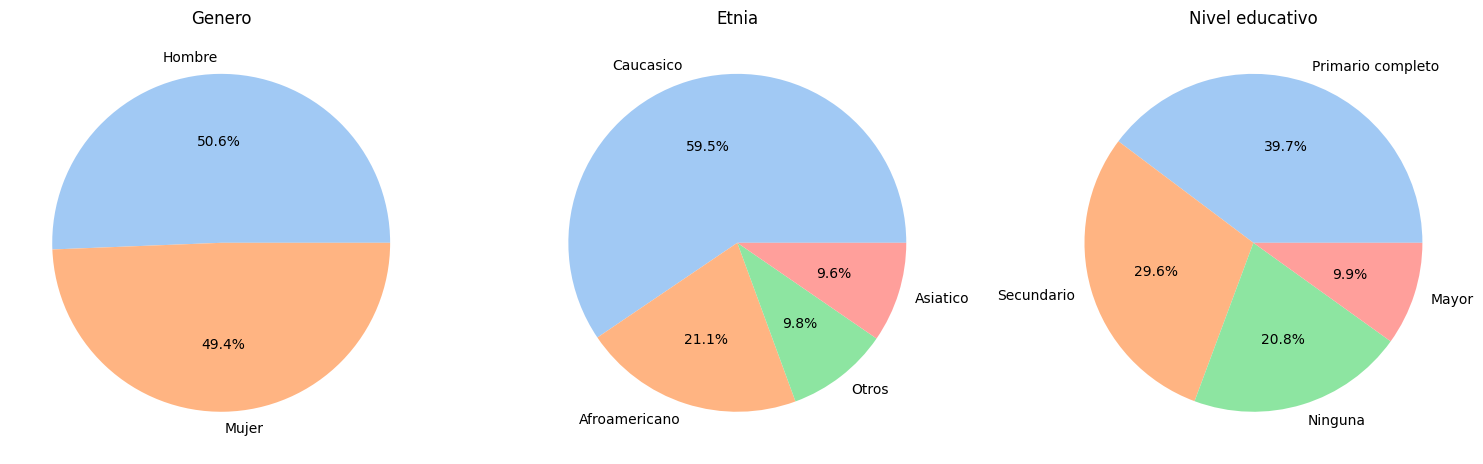

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
custom_labels = ['Hombre', 'Mujer']

gender_counts = df_clean['Gender'].value_counts()
axes[0].pie(gender_counts, labels=custom_labels, autopct='%1.1f%%', colors=pastel_colors)
axes[0].set_title('Genero')



ethnicity_counts = df_clean['Ethnicity'].value_counts()
axes[1].pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', colors=pastel_colors)
axes[1].set_title('Etnia')


education_level_counts = df_clean['EducationLevel'].value_counts()
axes[2].pie(education_level_counts, labels=education_level_counts.index, autopct='%1.1f%%', colors=pastel_colors)
axes[2].set_title('Nivel educativo')


plt.tight_layout()
plt.show()


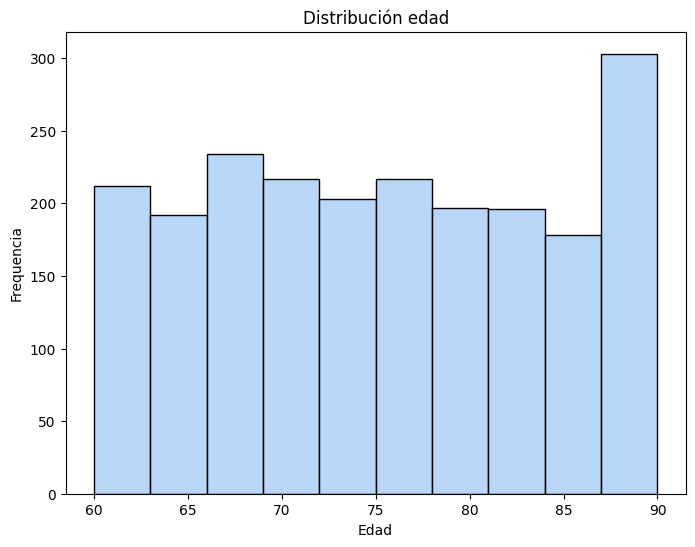

In [76]:
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['Age'], bins=10, color=pastel_colors[0])  # Using sns.histplot
plt.title('Distribución edad')
plt.xlabel('Edad')
plt.ylabel('Frequencia')
plt.show()

Factores de estilo de vida

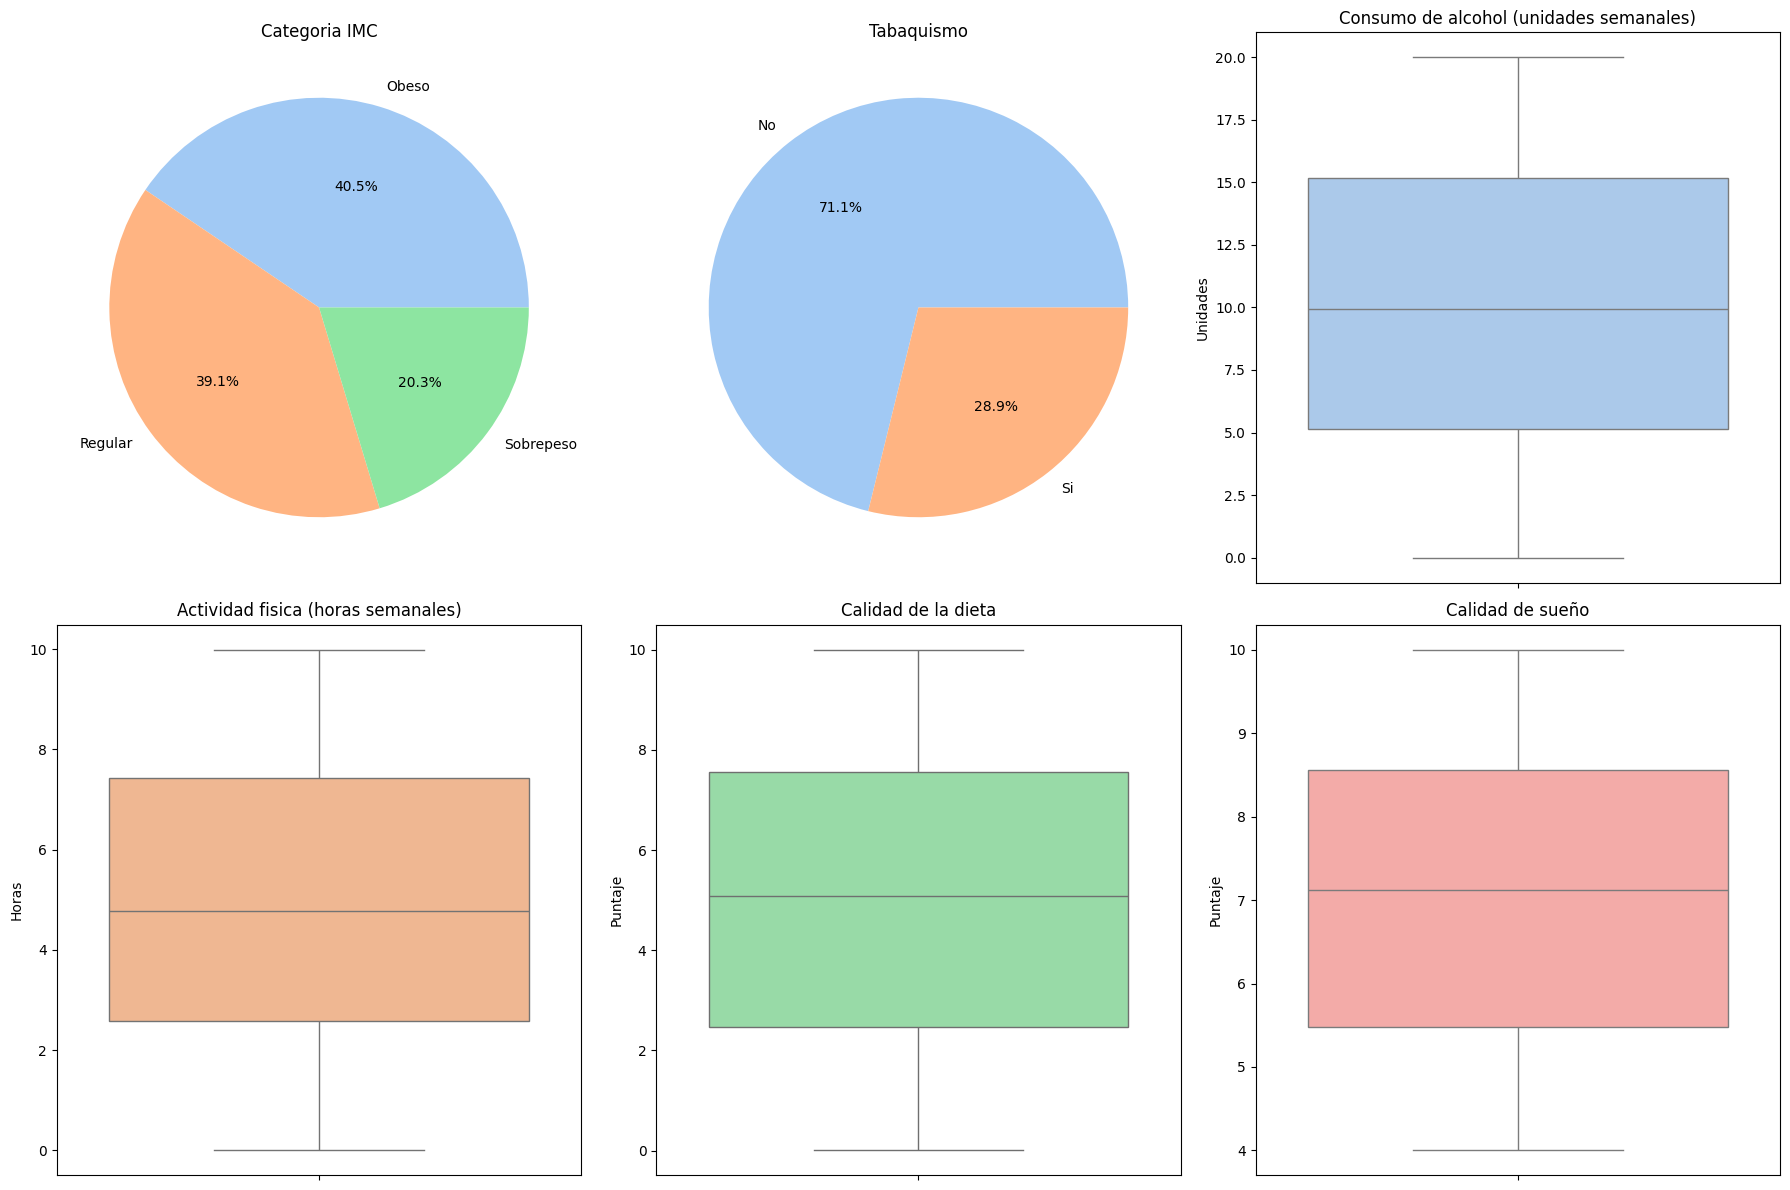

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))


bmi_category_counts = df_clean['bmi_category'].value_counts()
axes[0, 0].pie(bmi_category_counts, labels=bmi_category_counts.index, autopct='%1.1f%%', colors=pastel_colors)
axes[0, 0].set_title('Categoria IMC')


smoking_counts = df_clean['Smoking'].value_counts()
axes[0, 1].pie(smoking_counts, labels=['No', 'Si'], autopct='%1.1f%%', colors=pastel_colors)
axes[0, 1].set_title('Tabaquismo')


sns.boxplot(y=df_clean['AlcoholConsumption'], ax=axes[0, 2], color=pastel_colors[0])
axes[0, 2].set_title('Consumo de alcohol (unidades semanales)')
axes[0, 2].set_ylabel('Unidades')


sns.boxplot(y=df_clean['PhysicalActivity'], ax=axes[1, 0], color=pastel_colors[1])
axes[1, 0].set_title('Actividad fisica (horas semanales)')
axes[1, 0].set_ylabel('Horas')


sns.boxplot(y=df_clean['DietQuality'], ax=axes[1, 1], color=pastel_colors[2])
axes[1, 1].set_title('Calidad de la dieta')
axes[1, 1].set_ylabel('Puntaje')


sns.boxplot(y=df_clean['SleepQuality'], ax=axes[1, 2], color=pastel_colors[3])
axes[1, 2].set_title('Calidad de sueño')
axes[1, 2].set_ylabel('Puntaje')

plt.tight_layout()
plt.show()

Historia clínica

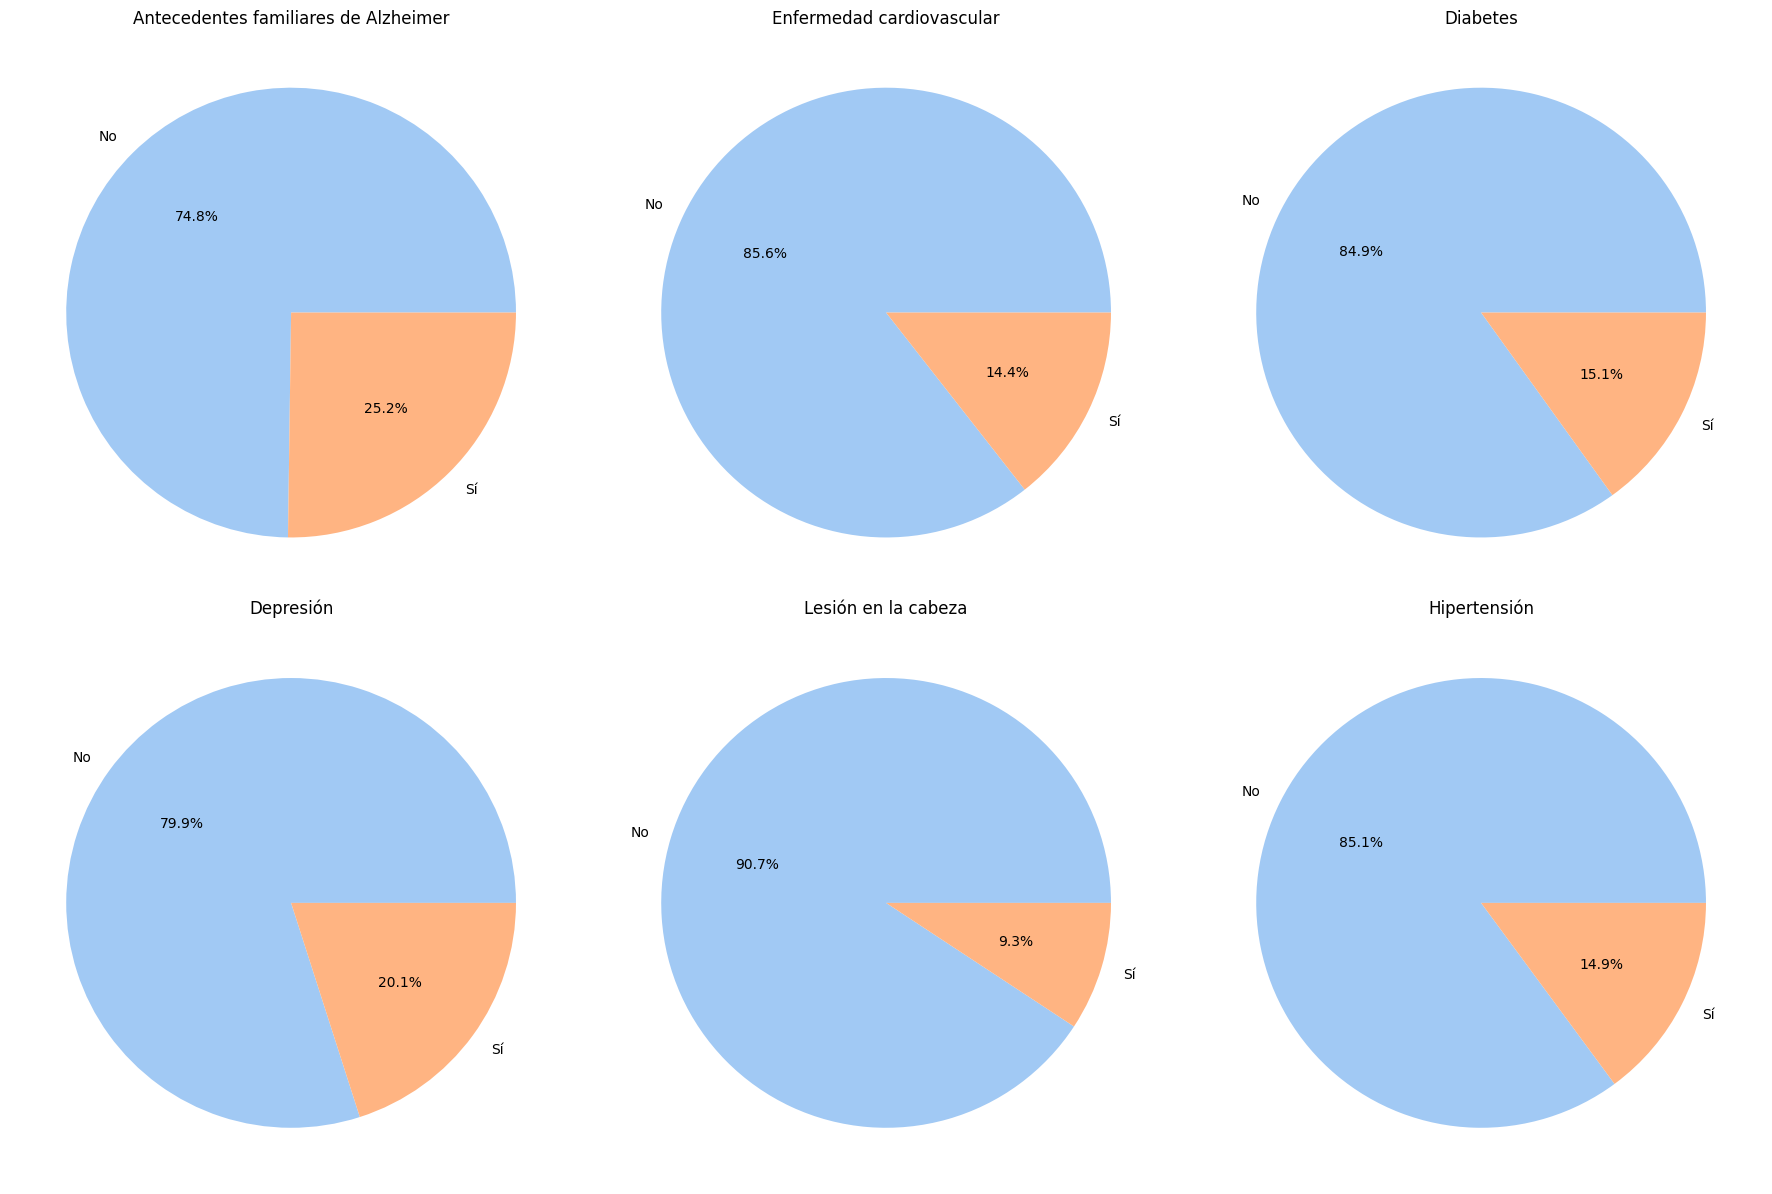

In [25]:
medical_history_vars = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
                        'Depression', 'HeadInjury', 'Hypertension']


titulos_español = ['Antecedentes familiares de Alzheimer', 'Enfermedad cardiovascular', 'Diabetes',
                'Depresión', 'Lesión en la cabeza', 'Hipertensión']


fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(medical_history_vars):
    counts = df_clean[var].value_counts()
    axes[i].pie(counts, labels=['No', 'Sí'], autopct='%1.1f%%', colors=pastel_colors)
    axes[i].set_title(titulos_español[i])

plt.tight_layout()
plt.show()

Medidas de tension arterial y analisis de sangre

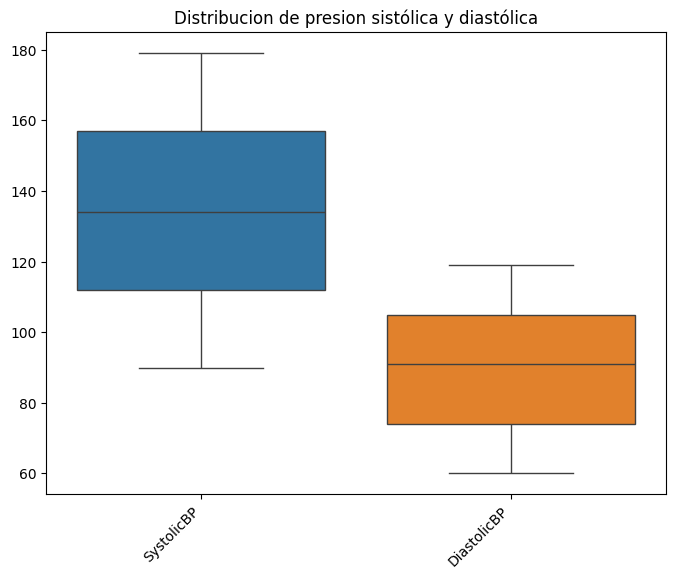

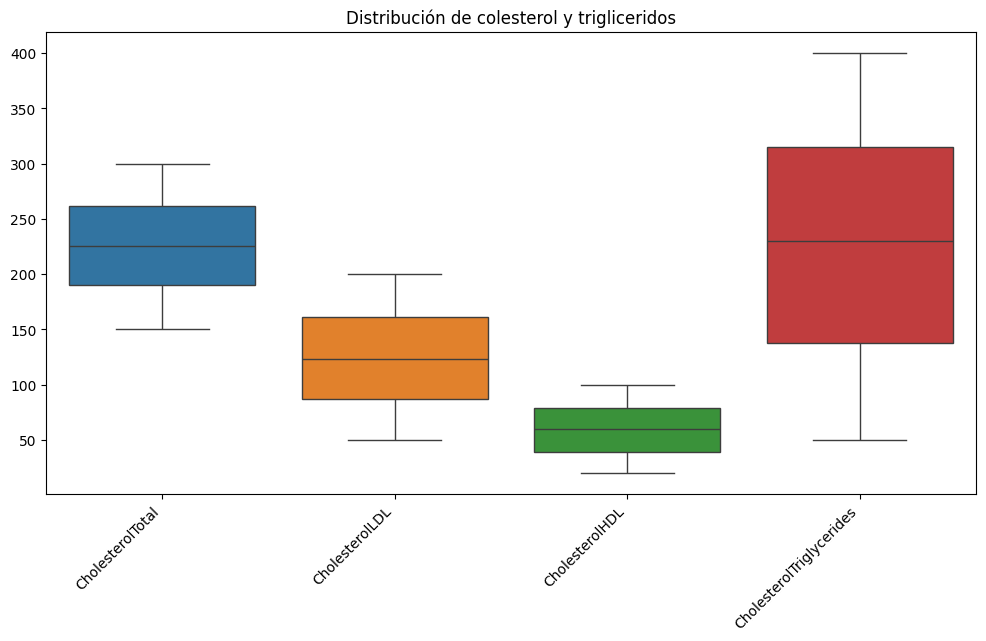

In [26]:
bp_vars = ['SystolicBP', 'DiastolicBP']


other_vars = ['CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']


plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean[bp_vars])
plt.title('Distribucion de presion sistólica y diastólica')
plt.xticks(rotation=45, ha='right')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[other_vars])
plt.title('Distribución de colesterol y trigliceridos')
plt.xticks(rotation=45, ha='right')
plt.show()

Evaluación cognitiva y funcional

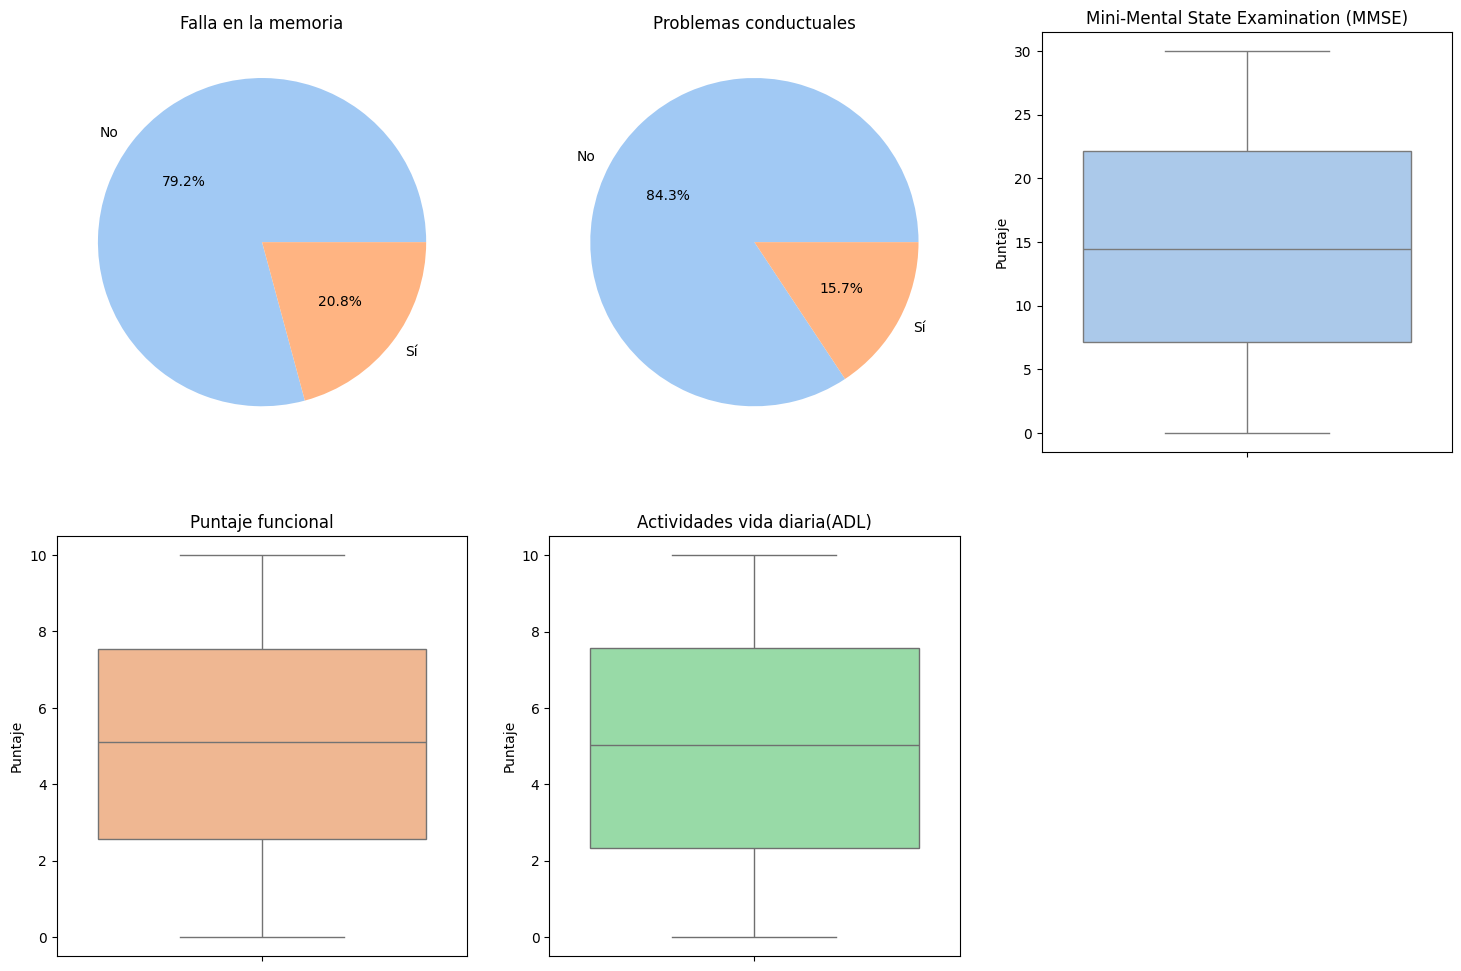

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

memory_counts = df_clean['MemoryComplaints'].value_counts()
axes[0, 0].pie(memory_counts, labels=['No', 'Sí'], autopct='%1.1f%%', colors=pastel_colors)
axes[0, 0].set_title('Falla en la memoria')

behavioral_counts = df_clean['BehavioralProblems'].value_counts()
axes[0, 1].pie(behavioral_counts, labels=['No', 'Sí'], autopct='%1.1f%%', colors=pastel_colors)
axes[0, 1].set_title('Problemas conductuales')


sns.boxplot(y=df_clean['MMSE'], ax=axes[0, 2], color=pastel_colors[0])
axes[0, 2].set_title('Mini-Mental State Examination (MMSE)')
axes[0, 2].set_ylabel('Puntaje')

sns.boxplot(y=df_clean['FunctionalAssessment'], ax=axes[1, 0], color=pastel_colors[1])
axes[1, 0].set_title('Puntaje funcional')
axes[1, 0].set_ylabel('Puntaje')

sns.boxplot(y=df_clean['ADL'], ax=axes[1, 1], color=pastel_colors[2])
axes[1, 1].set_title('Actividades vida diaria(ADL)')
axes[1, 1].set_ylabel('Puntaje')


fig.delaxes(axes[1,2])

Sintomas

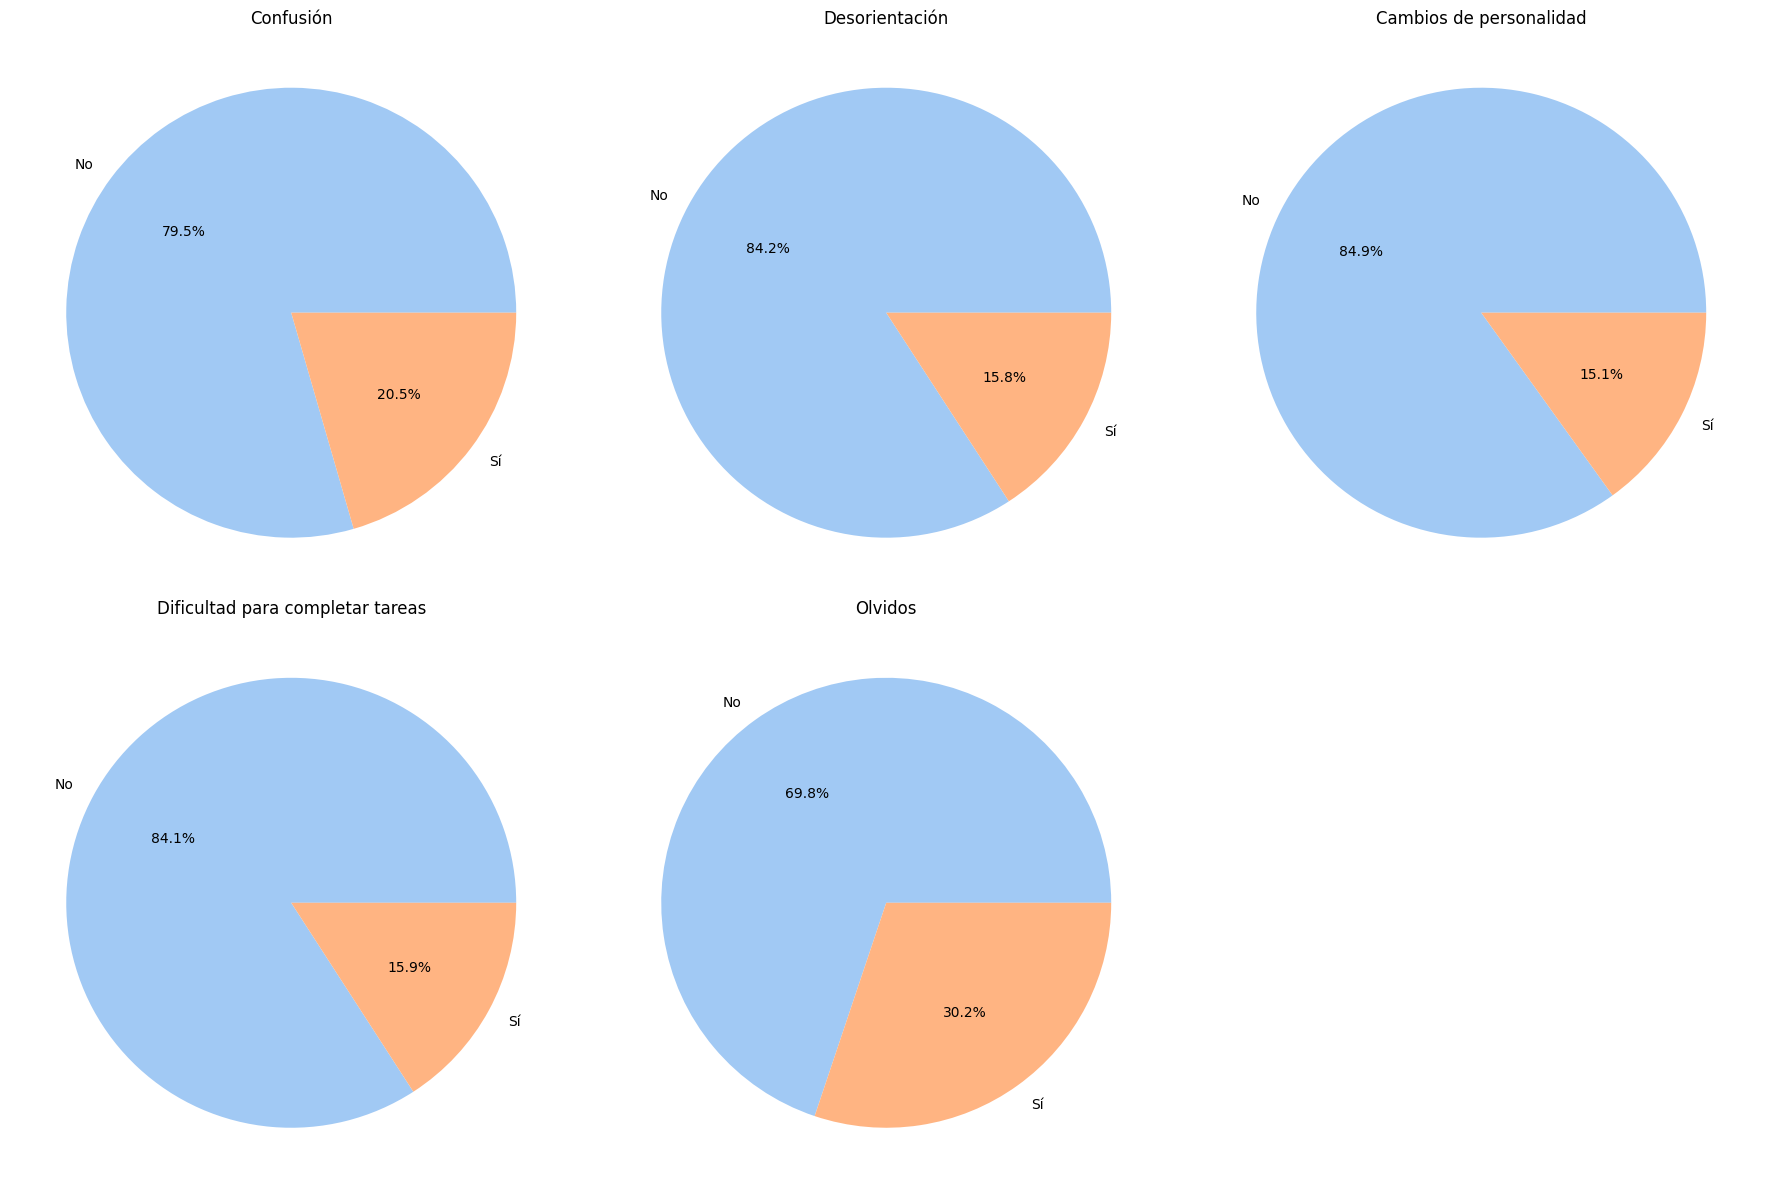

In [28]:
symptoms_vars = ['Confusion', 'Disorientation', 'PersonalityChanges',
                 'DifficultyCompletingTasks', 'Forgetfulness']


spanish_labels = ['Confusión', 'Desorientación', 'Cambios de personalidad',
                 'Dificultad para completar tareas', 'Olvidos']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(symptoms_vars):
    counts = df_clean[var].value_counts()
    axes[i].pie(counts, labels=['No', 'Sí'], autopct='%1.1f%%', colors=pastel_colors)
    axes[i].set_title(spanish_labels[i])

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

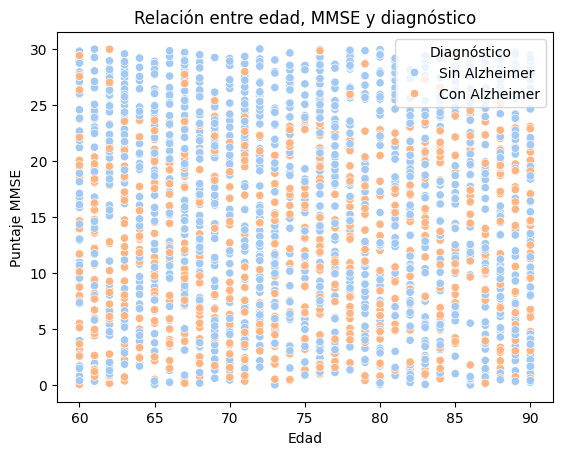

In [75]:
scatter = sns.scatterplot(x='Age', y='MMSE', hue='Diagnosis', data=df_clean, palette="pastel")

plt.xlabel('Edad')
plt.ylabel('Puntaje MMSE')
plt.title('Relación entre edad, MMSE y diagnóstico')


handles, labels = scatter.get_legend_handles_labels()


plt.legend(handles, ['Sin Alzheimer', 'Con Alzheimer'], title='Diagnóstico')

plt.show()

In [29]:
#df_ns = pd.get_dummies(df_clean, columns=['Ethnicity', 'bmi_category', 'EducationLevel'])

In [30]:
df_con_dummies = pd.get_dummies(df_clean, columns=['Ethnicity', 'bmi_category', 'EducationLevel'])

In [31]:
df_con_dummies.columns.to_list()

['Age',
 'Gender',
 'Smoking',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness',
 'Diagnosis',
 'Ethnicity_Afroamericano',
 'Ethnicity_Asiatico',
 'Ethnicity_Caucasico',
 'Ethnicity_Otros',
 'bmi_category_Obeso',
 'bmi_category_Regular',
 'bmi_category_Sobrepeso',
 'EducationLevel_Mayor',
 'EducationLevel_Ninguna',
 'EducationLevel_Primario completo',
 'EducationLevel_Secundario']

Escalar variables

In [32]:
scaler = StandardScaler()


In [33]:
columnas_numericas = ['Age', 'AlcoholConsumption', 'PhysicalActivity',
                 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP',
                 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
df_con_dummies[columnas_numericas] = scaler.fit_transform(df_con_dummies[columnas_numericas])


In [34]:
df_con_dummies.describe()

,Age,Gender,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2.149000e+03,2149.000000,2149.000000,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2149.000000,2149.000000,2149.000000,...,2.149000e+03,2149.000000,2149.000000,2.149000e+03,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5.819243e-16,0.506282,0.288506,-3.637027e-17,-6.447456e-17,-2.124354e-16,-5.455540e-17,0.252210,0.144253,0.150768,...,8.596608e-17,0.208004,0.156817,2.314471e-17,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,1.000233e+00,0.500077,0.453173,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,0.434382,0.351428,0.357906,...,1.000233e+00,0.405974,0.363713,1.000233e+00,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,-1.658721e+00,0.000000,0.000000,-1.743649e+00,-1.721177e+00,-1.713585e+00,-1.728968e+00,0.000000,0.000000,0.000000,...,-1.756387e+00,0.000000,0.000000,-1.689224e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.799155e-01,0.000000,0.000000,-8.511373e-01,-8.225290e-01,-8.715108e-01,-8.893586e-01,0.000000,0.000000,0.000000,...,-8.691953e-01,0.000000,0.000000,-8.952333e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.014730e-02,1.000000,0.000000,-1.824512e-02,-5.383387e-02,2.852085e-02,3.661895e-02,0.000000,0.000000,0.000000,...,4.973516e-03,0.000000,0.000000,1.899378e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.002101e-01,1.000000,1.000000,8.891560e-01,8.778833e-01,8.821022e-01,8.572323e-01,1.000000,0.000000,0.000000,...,8.529967e-01,0.000000,0.000000,8.811305e-01,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.679015e+00,1.000000,1.000000,1.728434e+00,1.773912e+00,1.720962e+00,1.672426e+00,1.000000,1.000000,1.000000,...,1.699963e+00,1.000000,1.000000,1.701132e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
alz_df = df_con_dummies

Evaluo correlación de variables con diagnóstico de Alzheimer

Correlaciones con variable dependiente('Diagnosis'):
Age                                -0.005488
Gender                             -0.020975
Smoking                            -0.004865
AlcoholConsumption                 -0.007618
PhysicalActivity                    0.005945
DietQuality                         0.008506
SleepQuality                       -0.056548
FamilyHistoryAlzheimers            -0.032900
CardiovascularDisease               0.031490
Diabetes                           -0.031508
Depression                         -0.005893
HeadInjury                         -0.021411
Hypertension                        0.035080
SystolicBP                         -0.015615
DiastolicBP                         0.005293
CholesterolTotal                    0.006394
CholesterolLDL                     -0.031976
CholesterolHDL                      0.042584
CholesterolTriglycerides            0.022672
MMSE                               -0.237126
FunctionalAssessment               -0.364898
Me

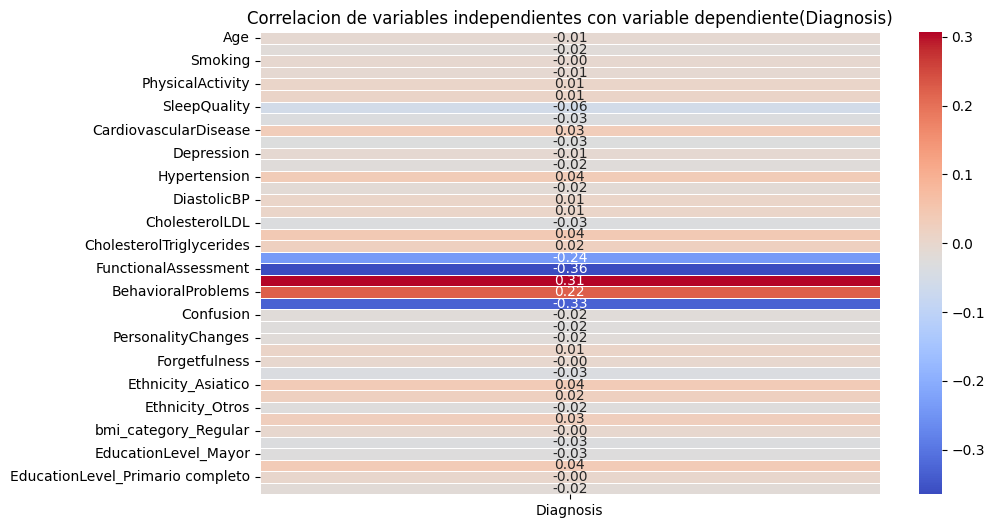

In [36]:
correlation_matrix = alz_df.corr()

target_correlations = correlation_matrix['Diagnosis'].drop('Diagnosis')

print("Correlaciones con variable dependiente('Diagnosis'):")
print(target_correlations)


plt.figure(figsize=(10, 6))
sns.heatmap(target_correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlacion de variables independientes con variable dependiente(Diagnosis)')
plt.show()

Elimino variables con muy baja correlación. No seteo umbral menor por disminuir en gran medida la cantidad de variables.

In [37]:
threshold = 0.001

low_correlation_features = target_correlations[abs(target_correlations) < threshold].index

print(low_correlation_features)

df_filtrada = df_con_dummies.drop(columns=low_correlation_features)

Index(['Forgetfulness', 'bmi_category_Regular',
       'EducationLevel_Primario completo'],
      dtype='object')


In [38]:
df_filtrada.columns.to_list()

['Age',
 'Gender',
 'Smoking',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Diagnosis',
 'Ethnicity_Afroamericano',
 'Ethnicity_Asiatico',
 'Ethnicity_Caucasico',
 'Ethnicity_Otros',
 'bmi_category_Obeso',
 'bmi_category_Sobrepeso',
 'EducationLevel_Mayor',
 'EducationLevel_Ninguna',
 'EducationLevel_Secundario']

Evaluar porcentaje de variable dependiente a predecir

In [39]:
df_filtrada.Diagnosis.value_counts(normalize='True')

,proportion
Diagnosis,
0,0.646347
1,0.353653


Observo que la variable es desproporcionada por lo que utilizare split stratificado para variable Y.

In [40]:
rs = 44

In [41]:
def split_data(df, target_variable):
    X = df.loc[ : , df.columns != target_variable]
    y = df[target_variable].astype('int')
    return train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [42]:
X_train, X_test, y_train, y_test = split_data(df_filtrada, 'Diagnosis')

Chequear proporciones correctas




In [43]:
print(y_train.value_counts(normalize='True'))
print(y_test.value_counts(normalize='True'))


Diagnosis
0    0.646306
1    0.353694
Name: proportion, dtype: float64
Diagnosis
0    0.646512
1    0.353488
Name: proportion, dtype: float64


Utilizo stratifiedkfold para validacion cruzada estratificada por tener variable dependiente no balanceada

In [44]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=rs)


Establezco funcion para facilitar conseguir medidas de accuracy, recall, precision, F1. Ademas de ROC-AUC, y creacion de matriz de confusion.

In [45]:
def get_metrics(X_test, y_test, model_grid):
    print(model_grid.best_params_)
    best_model = model_grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
        'Value': [accuracy, precision, recall, f1, roc_auc]
    })

    print(metrics_df)


    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Matriz de confusion')
    plt.show()


    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Ratio de falsos positivos')
    plt.ylabel('Ratio de verdaderos positivos')
    plt.title('(ROC)')
    plt.legend(loc="lower right")
    plt.show()

Regresión logistica

In [46]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', LogisticRegression(random_state=rs, max_iter=10000))
])


param_grid = {
    'poly__degree': [1, 2],
    'model__class_weight': [{0: 0.05, 1: 0.95}, {0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}],
    'model__C': [0.1, 1, 10],
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__solver': ['liblinear', 'saga'],
}


l1_ratio_values = [0.2, 0.5, 0.8]


recall = make_scorer(recall_score)

valid_param_combinations = []


for degree, class_weight, C, penalty, solver in itertools.product(
    param_grid['poly__degree'],
    param_grid['model__class_weight'],
    param_grid['model__C'],
    param_grid['model__penalty'],
    param_grid['model__solver'],
):

    if penalty == 'elasticnet' and solver != 'saga':
        continue
    if penalty == 'l1' and solver != 'liblinear':
        continue
    if penalty == 'l2' and solver not in ['liblinear', 'saga']:
        continue


    if penalty == 'elasticnet':
        for l1_ratio in l1_ratio_values:
            valid_param_combinations.append({
                'poly__degree': degree,
                'model__class_weight': class_weight,
                'model__C': C,
                'model__penalty': penalty,
                'model__solver': solver,
                'model__l1_ratio': l1_ratio
            })
    else:
        valid_param_combinations.append({
            'poly__degree': degree,
            'model__class_weight': class_weight,
            'model__C': C,
            'model__penalty': penalty,
            'model__solver': solver,
            'model__l1_ratio': None
        })


best_score = -1
grid_model_lr = None
best_params_lr = None

for param_combination in valid_param_combinations:
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid={key: [value] for key, value in param_combination.items()},
        scoring=recall,
        cv=stratified_kfold,
        verbose=0,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        grid_model_lr = grid_search.best_estimator_
        best_params_lr = grid_search.best_params_



print("Best Parameters:", best_params_lr)

Best Parameters: {'model__C': 0.1, 'model__class_weight': {0: 0.05, 1: 0.95}, 'model__l1_ratio': None, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'poly__degree': 1}


{'model__C': 10, 'model__class_weight': {0: 0.2, 1: 0.8}, 'model__l1_ratio': 0.8, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'poly__degree': 2}
      Metric     Value
0   Accuracy  0.779070
1  Precision  0.661017
2     Recall  0.769737
3   F1-Score  0.711246
4    ROC AUC  0.847430

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       278
           1       0.66      0.77      0.71       152

    accuracy                           0.78       430
   macro avg       0.76      0.78      0.77       430
weighted avg       0.79      0.78      0.78       430



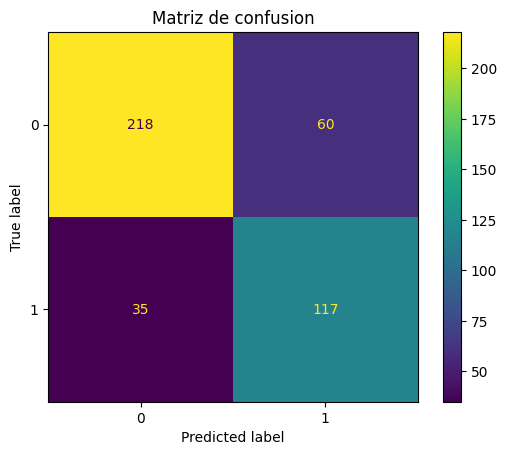

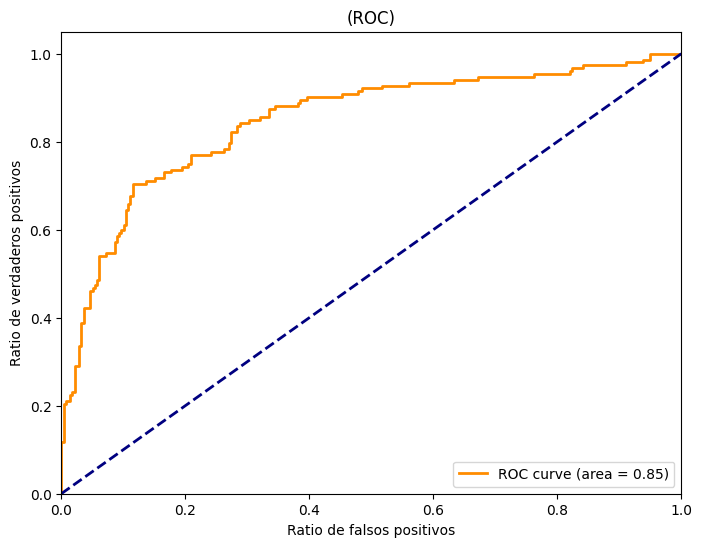

In [47]:
get_metrics(X_test, y_test, grid_search)

K-nearest neighbors

In [48]:
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 14, 18, 30, 40, 80, 100, 120, 150],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=stratified_kfold, scoring='recall', n_jobs=-1, verbose=0)

grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=44, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 14, 18, 30, 40, 80,
                                         100, 120, 150],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
      Metric     Value
0   Accuracy  0.765116
1  Precision  0.710744
2     Recall  0.565789
3   F1-Score  0.630037
4    ROC AUC  0.779025

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       278
           1       0.71      0.57      0.63       152

    accuracy                           0.77       430
   macro avg       0.75      0.72      0.73       430
weighted avg       0.76      0.77      0.76       430



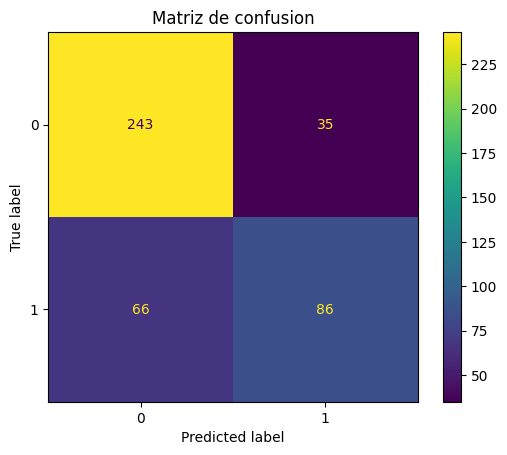

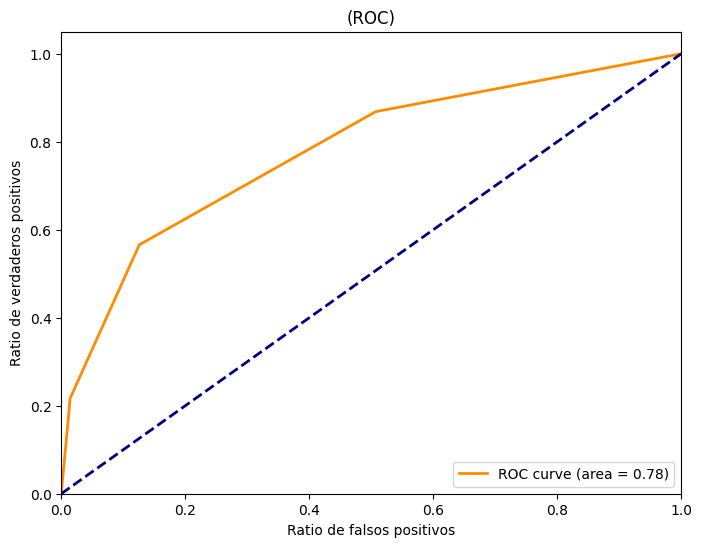

In [49]:
get_metrics(X_test, y_test, grid_search_knn)

Decision tree

In [58]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5, 7, 10],
    'min_samples_split': [2, 3, 5, 10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 3, 5, 10, 15],
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='recall', cv=stratified_kfold, n_jobs=-1, verbose=0)

grid_search_dt.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=44, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 3, 5, 10, 15],
                         'min_samples_split': [2, 3, 5, 10, 20, 30, 40],
                         'splitter': ['best', 'random']},
             scoring='recall')

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 30, 'splitter': 'best'}
      Metric     Value
0   Accuracy  0.934884
1  Precision  0.918919
2     Recall  0.894737
3   F1-Score  0.906667
4    ROC AUC  0.924496

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       278
           1       0.92      0.89      0.91       152

    accuracy                           0.93       430
   macro avg       0.93      0.93      0.93       430
weighted avg       0.93      0.93      0.93       430



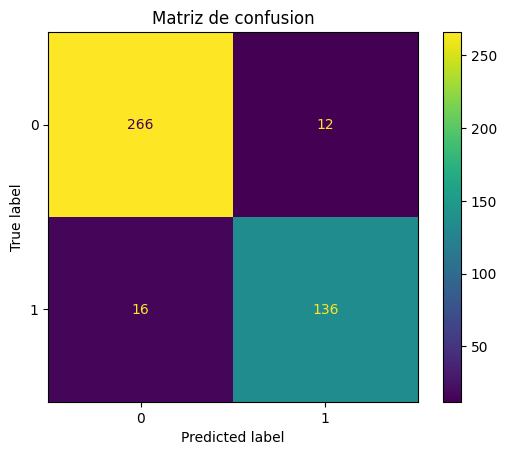

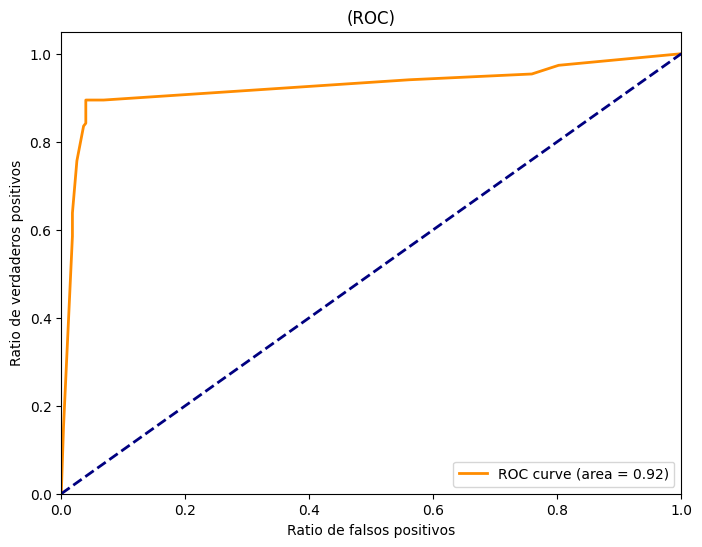

In [57]:
get_metrics(X_test, y_test, grid_search_dt)

In [59]:
dot_data = export_graphviz(
    grid_search_dt.best_estimator_,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['No Alzheimer\'s', 'Alzheimer\'s'],
    filled=True,
    rounded=True,
    special_characters=True
)

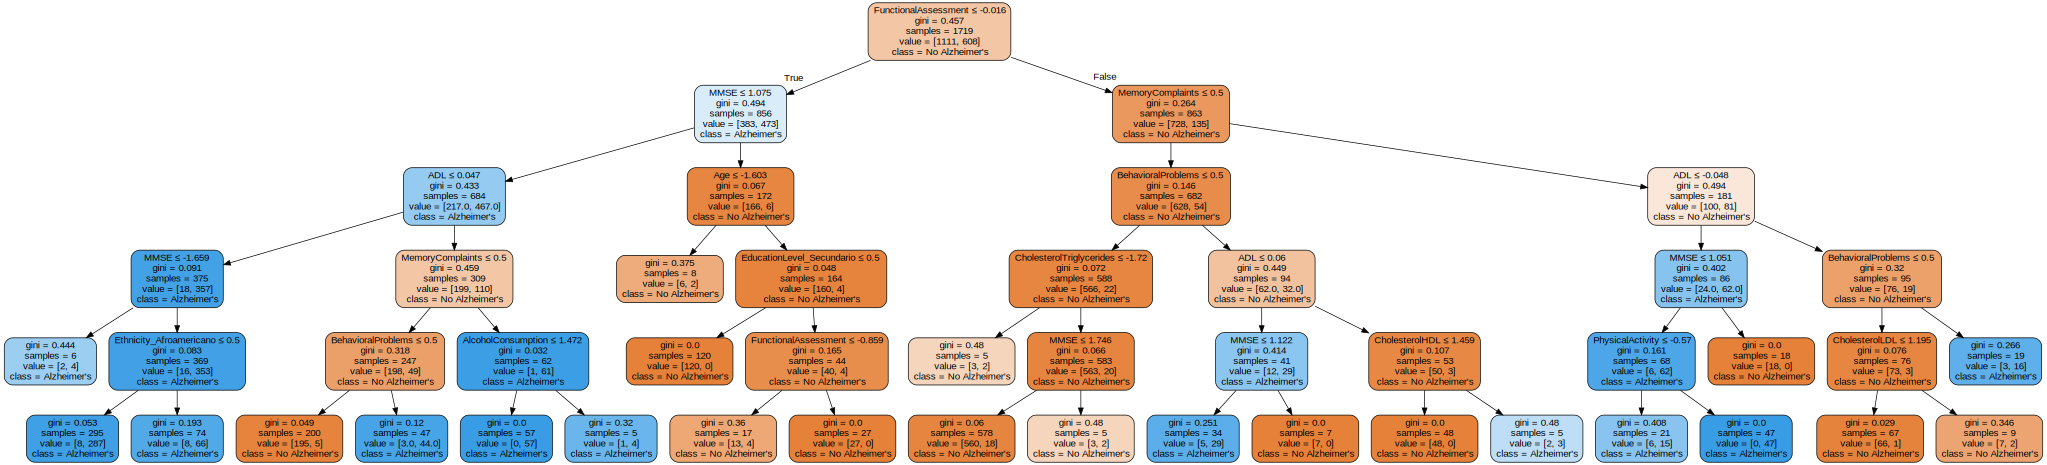

In [67]:
graph = graphviz.Source(dot_data)
graph

In [61]:
from sklearn.ensemble import RandomForestClassifier


In [64]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='recall', cv=stratified_kfold, n_jobs=-1, verbose=0)

grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=44, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 5, 10, 20, 50],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='recall')

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
      Metric     Value
0   Accuracy  0.939535
1  Precision  0.963235
2     Recall  0.861842
3   F1-Score  0.909722
4    ROC AUC  0.939606

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       278
           1       0.96      0.86      0.91       152

    accuracy                           0.94       430
   macro avg       0.95      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430



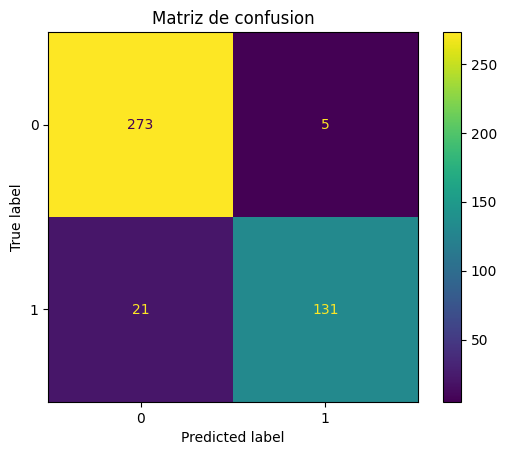

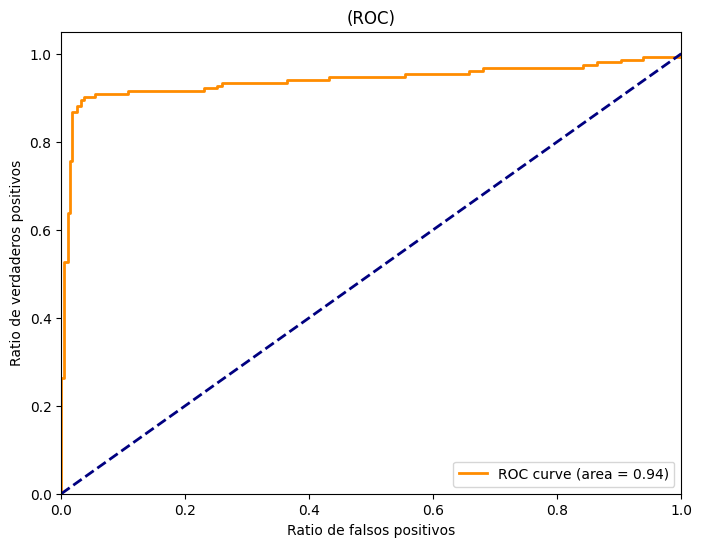

In [65]:
get_metrics(X_test, y_test, grid_search_rf)

In [66]:
def get_model_metrics(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    return pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1],
        'ROC AUC': [roc_auc]
    })


model_metrics_lr = get_model_metrics(grid_search.best_estimator_, X_test, y_test, "Logistic Regression")
model_metrics_dt = get_model_metrics(grid_search_dt.best_estimator_, X_test, y_test, "Decision Tree")
model_metrics_knn = get_model_metrics(grid_search_knn.best_estimator_, X_test, y_test, "K-Nearest Neighbors")
model_metrics_rf = get_model_metrics(grid_search_rf.best_estimator_, X_test, y_test, "Random Forest")


all_metrics_df = pd.concat([model_metrics_lr, model_metrics_dt, model_metrics_knn, model_metrics_rf], ignore_index=True)


all_metrics_df = all_metrics_df.sort_values(by=['Recall'], ascending=False)

all_metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
1,Decision Tree,0.934884,0.918919,0.894737,0.906667,0.924496
3,Random Forest,0.939535,0.963235,0.861842,0.909722,0.939606
0,Logistic Regression,0.779070,0.661017,0.769737,0.711246,0.847430
2,K-Nearest Neighbors,0.765116,0.710744,0.565789,0.630037,0.779025


### Variables Categóricas

| Variable                           | Valores Únicos  | Observaciones Clave                                               |
|------------------------------------|-----------------|-------------------------------------------------------------------|
| Género (0=Hombre, 1=Mujer)         | Balanceado      | Representación equitativa permite analizar diferencias entre géneros. |
| Fumador (0=No, 1=Sí)               | ~29% Sí         | Porcentaje significativo de fumadores, asociado a mayor riesgo vascular. |
| Antecedentes Familiares            | ~25% Sí         | Cuarto de la población con predisposición genética a Alzheimer.   |
| Hipertensión                       | ~15% Sí         | Subconjunto relevante con presión arterial elevada, un factor de riesgo conocido. |
| Diabetes                           | ~15% Sí         | La prevalencia de diabetes refuerza los riesgos metabólicos asociados. |
| Depresión                          | ~20% Sí         | Problemas de salud mental que pueden correlacionar con deterioro cognitivo. |
| Problemas de Comportamiento        | ~16% Sí         | Síntomas conductuales presentes, probablemente vinculados con el Alzheimer. |
| Quejas de Memoria                  | ~21% Sí         | Un grupo considerable reporta problemas de memoria, indicador temprano. |

---

### Variables Numéricas

| Variable                  | Media   | Desvío Std | Mínimo | Máximo | Observaciones Clave                                               |
|---------------------------|---------|------------|--------|--------|-------------------------------------------------------------------|
| Edad (Age)                | 74.91   | 8.99       | 60.00  | 90.00  | Población predominantemente adulta mayor, consistente con estudios sobre Alzheimer. |
| Consumo de Alcohol        | 10.04   | 5.76       | 0.00   | 19.99  | Moderado en promedio, pero con valores extremos en el rango superior. |
| Actividad Física          | 4.92    | 2.86       | 0.00   | 9.98   | Baja actividad física, indicando una población mayormente sedentaria. |
| Calidad de Dieta          | 4.99    | 2.91       | 0.01   | 9.99   | La calidad de dieta es variable, con valores bajos que sugieren dietas inadecuadas. |
| Calidad de Sueño          | 7.05    | 1.76       | 4.00   | 9.99   | En general, buena calidad de sueño, aunque con variabilidad en el rango inferior. |
| Presión Sistólica         | 134.26  | 25.95      | 90.00  | 179.00 | Niveles elevados sugieren hipertensión en un subconjunto significativo. |
| Presión Diastólica        | 89.85   | 17.59      | 60.00  | 119.00 | Patrones similares a la presión sistólica, asociados a riesgos cardiovasculares. |
| Colesterol Total          | 225.20  | 42.54      | 150.09 | 299.99 | Valores promedio elevados, indicando dislipidemia en la población. |
| MMSE (Examen Cognitivo)   | 14.76   | 8.61       | 0.00   | 29.99  | Puntajes bajos en promedio, lo que sugiere deterioro cognitivo significativo. |
| Evaluación Funcional      | 5.08    | 2.89       | 0.00   | 9.99   | Limitaciones funcionales evidentes, con valores medianos moderados. |
| ADL (Actividades Diarias) | 4.98    | 2.95       | 0.00   | 9.99   | Limitaciones similares a la evaluación funcional, destacando dificultades diarias. |


| Métrica    | Valor   |
|------------|---------|
| Precisión  | 91.89%  |
| Recall     | 89.47%  |
| F1-Score   | 90.67%  |
| ROC-AUC    | 92.45%  |